# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

In [1]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

# Setup
Pull in respective libraries to prepare the notebook environment

In [1]:
!git clone https://github.com/ultralytics/yolov5.git # clone
%cd yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-267-gbe348cc Python-3.7.15 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/107.7 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Tn8tkNkxlsyZlCbBhoch")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
dataset = project.version(25).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

# 1. Infer on COCO-128 + ASL dataset

In [3]:
# from utils.downloads import attempt_download

# p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
# cls = [f'{x}-seg' for x in p5]  # segmentation models

# for x in cls:
#     attempt_download(f'weights/yolov5{x}.pt')

In [4]:
#Weights with ASL for 100 epoch

!git clone https://github.com/sachin-rastogi/yolov5-seg-ASL-weights.git

Cloning into 'yolov5-seg-ASL-weights'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [5]:
!ls yolov5-seg-ASL-weights

best.pt  example_images  README.md


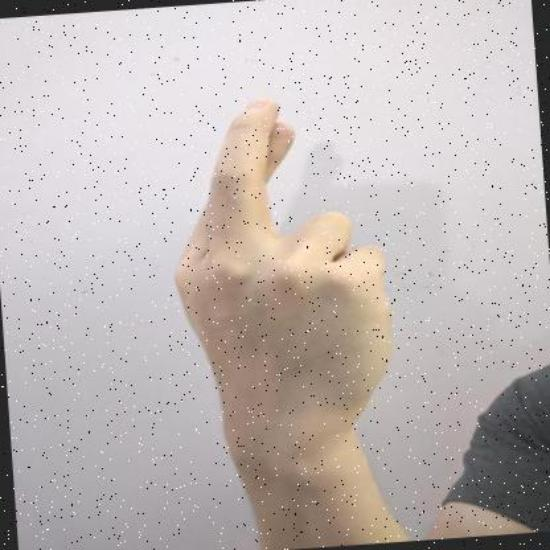

In [6]:
display.Image(filename='/content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg', width=600)

In [7]:
# import required module
from PIL import Image
  
# get image
img = Image.open('/content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg')
  
# get width and height
width = img.width
height = img.height
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  550
The width of the image is:  550


In [8]:
# #Infer using segment/predict.py
# !python segment/predict.py --weights ./weights/yolov5s-seg.pt --source zebra.jpg
# display.Image(filename='runs/predict-seg/exp/zebra.jpg', width=600)

#Infer using segment/predict.py
!python segment/predict.py --weights ./yolov5-seg-ASL-weights/best.pt --source /content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg --device 'cpu' --img 320

segment/predict: weights=['./yolov5-seg-ASL-weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v6.2-267-gbe348cc Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg: 320x320 1 R, 165.1ms
Speed: 1.5ms pre-process, 165.1ms inference, 18.0ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/pre

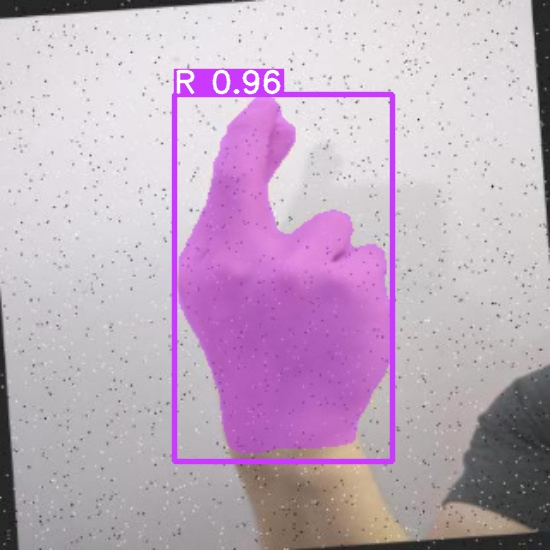

In [9]:
display.Image(filename='runs/predict-seg/exp/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg', width=600)

## Inference using OV TORT

In [10]:
# Install torch-ort-infer
!pip install torch-ort-infer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.8 MB 1.2 MB/s 
     |████████████████████████████████| 13.1 MB 39.3 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cerberus: filename=Cerberus-1.3.4-py3-none-any.whl size=58195 sha256=b57133597ddbaf7a6a809e6e5f1c89aae075a9943e8db17d6a1d41874f91e9d9
  Stored in directory: /root/.cache/pip/wheels/6c/bd/4b/a3b7dcd0bc718e601a9ba7cba5f7c1d73fd777b6dc48d6eaa0
Successfully built cerberus


In [11]:
!python -m torch_ort.configure

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running build
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:411: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
building 'torch_interop_utils' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/usr
creating build/temp.linux-x86_64-3.7/usr/local
creating build/temp.linux-x86_64-3.7/usr/local/lib
creating build/temp.linux-x86_64-3.7/usr/local/lib/python3.7
creating build/temp.linux-x86_64-3.7/usr/local/lib/python3.7/dist-packages
creating build/temp.linux-x86_64-3.7/usr/local/lib/python3.7/dist-packages/onnxruntime
creating build/temp.linux-x86_64-3.7/usr/local/lib/python3.7/dist-packages/onnxruntime/training
creating build/temp.li

In [12]:
%%writefile segment/predict_ovtort.py

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
"""
Run YOLOv5 segmentation inference on images, videos, directories, streams, etc.

Usage - sources:
    $ python segment/predict.py --weights yolov5s-seg.pt --source 0                               # webcam
                                                                  img.jpg                         # image
                                                                  vid.mp4                         # video
                                                                  path/                           # directory
                                                                  'path/*.jpg'                    # glob
                                                                  'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                                  'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

Usage - formats:
    $ python segment/predict.py --weights yolov5s-seg.pt                 # PyTorch
                                          yolov5s-seg.torchscript        # TorchScript
                                          yolov5s-seg.onnx               # ONNX Runtime or OpenCV DNN with --dnn
                                          yolov5s-seg_openvino_model     # OpenVINO
                                          yolov5s-seg.engine             # TensorRT
                                          yolov5s-seg.mlmodel            # CoreML (macOS-only)
                                          yolov5s-seg_saved_model        # TensorFlow SavedModel
                                          yolov5s-seg.pb                 # TensorFlow GraphDef
                                          yolov5s-seg.tflite             # TensorFlow Lite
                                          yolov5s-seg_edgetpu.tflite     # TensorFlow Edge TPU
                                          yolov5s-seg_paddle_model       # PaddlePaddle
"""

import argparse
import os
import platform
import sys
from pathlib import Path

import torch

from torch_ort import ORTInferenceModule

FILE = Path(__file__).resolve()
ROOT = FILE.parents[1]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadScreenshots, LoadStreams
from utils.general import (LOGGER, Profile, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_boxes, scale_segments,
                           strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.segment.general import masks2segments, process_mask
from utils.torch_utils import select_device, smart_inference_mode
import time

@smart_inference_mode()
def run(
    weights=ROOT / 'yolov5s-seg.pt',  # model.pt path(s)
    source=ROOT / 'data/images',  # file/dir/URL/glob/screen/0(webcam)
    data=ROOT / 'data/coco128.yaml',  # dataset.yaml path
    imgsz=(640, 640),  # inference size (height, width)
    conf_thres=0.25,  # confidence threshold
    iou_thres=0.45,  # NMS IOU threshold
    max_det=1000,  # maximum detections per image
    device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
    view_img=False,  # show results
    save_txt=False,  # save results to *.txt
    save_conf=False,  # save confidences in --save-txt labels
    save_crop=False,  # save cropped prediction boxes
    nosave=False,  # do not save images/videos
    classes=None,  # filter by class: --class 0, or --class 0 2 3
    agnostic_nms=False,  # class-agnostic NMS
    augment=False,  # augmented inference
    visualize=False,  # visualize features
    update=False,  # update all models
    project=ROOT / 'runs/predict-seg',  # save results to project/name
    name='exp',  # save results to project/name
    exist_ok=False,  # existing project/name ok, do not increment
    line_thickness=3,  # bounding box thickness (pixels)
    hide_labels=False,  # hide labels
    hide_conf=False,  # hide confidences
    half=False,  # use FP16 half-precision inference
    dnn=False,  # use OpenCV DNN for ONNX inference
    vid_stride=1,  # video frame-rate stride
    retina_masks=False,
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    screenshot = source.lower().startswith('screen')
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    
    stride, names, pt = model.stride, model.names, model.pt


    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    bs = 1  # batch_size
    if webcam:
        view_img = check_imshow(warn=True)
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
        bs = len(dataset)
    elif screenshot:
        dataset = LoadScreenshots(source, img_size=imgsz, stride=stride, auto=pt)
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model = ORTInferenceModule(model)
    
    #warmup
    #model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # warmup

    if pt:
      print(f"Sachin pt:{pt}")
      #for i in range(5):
      print(*imgsz)
      model(torch.zeros(1, 3, imgsz[0], imgsz[1]).to(device), augment=False, visualize=False)[:2]

    seen, windows, dt = 0, [], (Profile(), Profile(), Profile())
    for path, im, im0s, vid_cap, s in dataset:
        with dt[0]:
            #im = torch.from_numpy(im).to(model.device)
            im = torch.from_numpy(im).to(device)
            #im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
            im = im.half() if half else im.float()  # uint8 to fp16/32
            im /= 255  # 0 - 255 to 0.0 - 1.0
            if len(im.shape) == 3:
                im = im[None]  # expand for batch dim
        
        # Inference
        with dt[1]:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            pred, proto = model(im, augment=augment, visualize=visualize)[:2]

        # NMS
        with dt[2]:
            pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det, nm=32)

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                masks = process_mask(proto[i], det[:, 6:], det[:, :4], im.shape[2:], upsample=True)  # HWC
                det[:, :4] = scale_boxes(im.shape[2:], det[:, :4], im0.shape).round()  # rescale boxes to im0 size

                # Segments
                if save_txt:
                    segments = reversed(masks2segments(masks))
                    segments = [scale_segments(im.shape[2:], x, im0.shape).round() for x in segments]

                # Print results
                for c in det[:, 5].unique():
                    n = (det[:, 5] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Mask plotting
                annotator.masks(masks,
                                colors=[colors(x, True) for x in det[:, 5]],
                                im_gpu=None if retina_masks else im[i])

                # Write results
                for j, (*xyxy, conf, cls) in enumerate(reversed(det[:, :6])):
                    if save_txt:  # Write to file
                        segj = segments[j].reshape(-1)  # (n,2) to (n*2)
                        line = (cls, *segj, conf) if save_conf else (cls, *segj)  # label format
                        with open(f'{txt_path}.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                        # annotator.draw.polygon(segments[j], outline=colors(c, True), width=3)
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)

            # Stream results
            im0 = annotator.result()
            if view_img:
                if platform.system() == 'Linux' and p not in windows:
                    windows.append(p)
                    cv2.namedWindow(str(p), cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)  # allow window resize (Linux)
                    cv2.resizeWindow(str(p), im0.shape[1], im0.shape[0])
                cv2.imshow(str(p), im0)
                if cv2.waitKey(1) == ord('q'):  # 1 millisecond
                    exit()

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix('.mp4'))  # force *.mp4 suffix on results videos
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        LOGGER.info(f"INFERENCE TIME WITH OPENVINO™ INTEGRATION WITH TORCH-ORT IS : {s}{'' if len(det) else '(no detections), '}{dt[1].dt * 1E3:.1f}ms")

    # Print results
    t = tuple(x.t / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights[0])  # update model (to fix SourceChangeWarning)


def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s-seg.pt', help='model path(s)')
    parser.add_argument('--source', type=str, default=ROOT / 'data/images', help='file/dir/URL/glob/screen/0(webcam)')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default=ROOT / 'runs/predict-seg', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    parser.add_argument('--vid-stride', type=int, default=1, help='video frame-rate stride')
    parser.add_argument('--retina-masks', action='store_true', help='whether to plot masks in native resolution')
    opt = parser.parse_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    print_args(vars(opt))
    return opt


def main(opt):
    check_requirements(exclude=('tensorboard', 'thop'))
    run(**vars(opt))


if __name__ == "__main__":
    opt = parse_opt()
    main(opt)

Writing segment/predict_ovtort.py


In [13]:
#Infer using segment/predict_ovtort.py

!python segment/predict_ovtort.py --weights ./yolov5-seg-ASL-weights/best.pt --source /content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg --device 'cpu' --img 320

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
segment/predict_ovtort: weights=['./yolov5-seg-ASL-weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v6.2-267-gbe348cc Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
Sachin pt:True
320 320
/content/yolov5/models/common.py:515: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flo

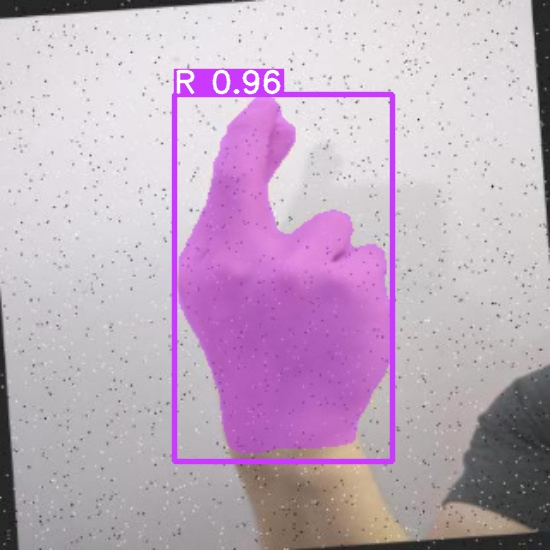

In [15]:
display.Image(filename='runs/predict-seg/exp2/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg', width=600)

**Compare the time difference with Stock PyTorch and with OpenVINO Integration with Torch ORT.(Lower the better)**  



**Stock PT:** image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg: 320x320 1 R, **165.1ms**  


**OVTORT:** INFERENCE TIME WITH OPENVINO™ INTEGRATION WITH TORCH-ORT IS : image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-25/valid/images/R1_jpg.rf.bef002c75782c424e2bc29ef877c9b45.jpg: 320x320 1 R, **120.9ms**